In [1]:
import tensorflow as tf
print(tf.__version__)
print("GPU", "Available" if tf.config.list_physical_devices('GPU') else "Not Found")

2.10.1
GPU Available


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the Data

In [3]:
df = pd.read_csv("../1. Keras Basics/Data/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


# Visualisation

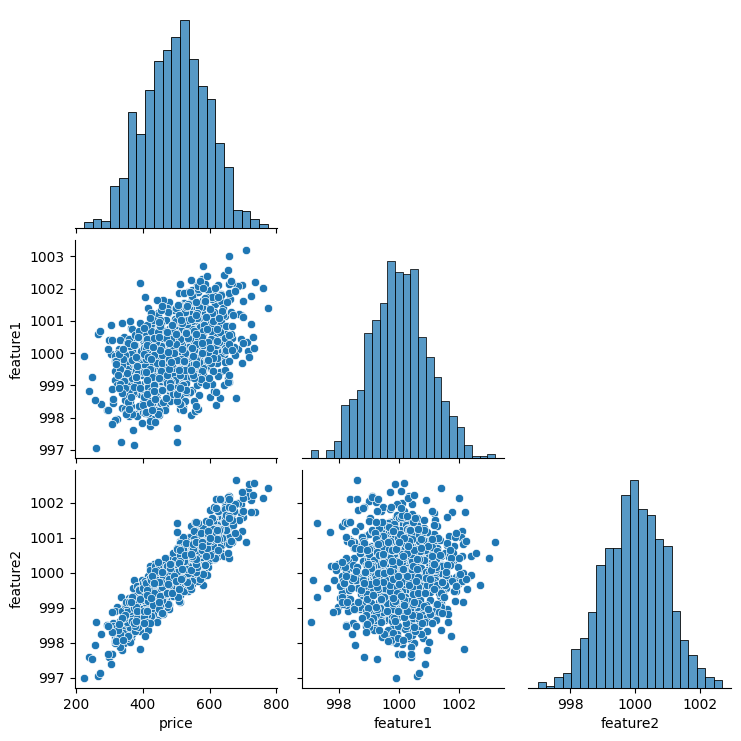

In [4]:
sns.pairplot(df, corner=True);

# Train/test Split

In [5]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop("price", axis=1)
y = df["price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(200, 2) (800, 2) (200,) (800,)


# Normalizing/Scaling the Data

Make all the data come btw 0-1 by scaling it accordingly

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [8]:
scaler.fit(X_train)

MinMaxScaler()

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[0.6096    , 0.67841447],
       [0.52888958, 0.20003528],
       [0.66124446, 0.48545932],
       ...,
       [0.55540613, 0.78470227],
       [0.29338885, 0.38107935],
       [0.56890903, 0.41595995]])

# Creating a Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Layers are added in sequential manner

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

**CAN CHOOSE MANY OPTIMIZERS BUT LOSS HAS TO BE THESE ONLY**

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [11]:
# Adding Layers one by one, one layer at a time
model = Sequential()

model.add(Dense(4,activation='relu')) # 4 Neurons in the first layer using the 
model.add(Dense(4,activation='relu')) # 2 Neurons in the second
model.add(Dense(4,activation='relu')) # activation function of  Rectified Linear Unit

model.add(Dense(1)) # Output 1 Neuron Because we are only predicting 1 thing: price

model.compile(optimizer="rmsprop", loss="mse")

# Training a Model:

We should have a large epochs value but later on we will have callbacks to stop at certain epochs, validation_data

In [16]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
 1/25 [>.............................] - ETA: 0s - loss: 23.2989

25/25 [==============================] - 0s 7ms/step - loss: 23.8526
Epoch 2/250
25/25 [==============================] - 0s 7ms/step - loss: 24.1927
Epoch 3/250
25/25 [==============================] - 0s 8ms/step - loss: 24.2085
Epoch 4/250
25/25 [==============================] - 0s 7ms/step - loss: 24.0502
Epoch 5/250
25/25 [==============================] - 0s 8ms/step - loss: 24.1025
Epoch 6/250
25/25 [==============================] - 0s 8ms/step - loss: 24.0514
Epoch 7/250
25/25 [==============================] - 0s 5ms/step - loss: 24.2670
Epoch 8/250
25/25 [==============================] - 0s 4ms/step - loss: 23.8982
Epoch 9/250
25/25 [==============================] - 0s 4ms/step - loss: 24.1780
Epoch 10/250
25/25 [==============================] - 0s 4ms/step - loss: 23.9410
Epoch 11/250
25/25 [==============================] - 0s 4ms/step - loss: 23.9657
Epoch 12/250
25/25 [==============================] - 0s 4ms/step - loss: 24.0944
Epoch 13/250
25/25 [=================

In [17]:
model.history.history

{'loss': [23.852636337280273,
  24.192739486694336,
  24.208518981933594,
  24.050220489501953,
  24.10248374938965,
  24.051382064819336,
  24.26696014404297,
  23.89824867248535,
  24.178037643432617,
  23.940963745117188,
  23.965686798095703,
  24.094350814819336,
  24.16656494140625,
  23.90396499633789,
  23.898035049438477,
  24.167739868164062,
  24.05821990966797,
  24.059608459472656,
  24.003522872924805,
  23.99962615966797,
  24.249361038208008,
  24.047622680664062,
  24.019203186035156,
  24.298667907714844,
  23.897205352783203,
  24.078359603881836,
  24.256921768188477,
  24.181568145751953,
  24.073841094970703,
  24.26000213623047,
  24.01833724975586,
  24.09353256225586,
  23.926279067993164,
  24.275663375854492,
  24.207294464111328,
  24.078584671020508,
  24.046131134033203,
  24.175487518310547,
  24.21816635131836,
  24.265146255493164,
  23.989463806152344,
  23.96849822998047,
  24.031091690063477,
  23.996625900268555,
  24.277969360351562,
  23.883485794

In [18]:
loss = model.history.history['loss']

Text(0.5, 1.0, 'Training Loss per Epoch')

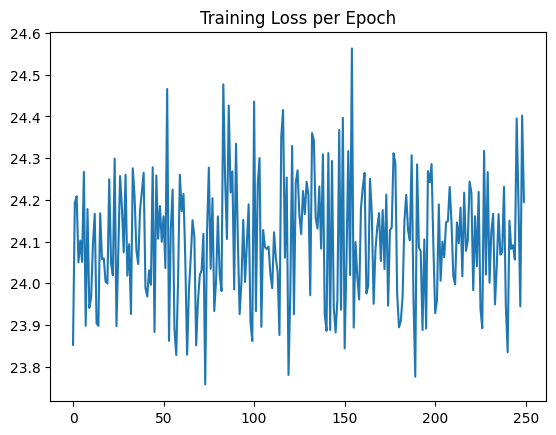

In [19]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss per Epoch")